In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 80.56%
Test score with L1 penalty: 0.8406
Example run in 9.214 s


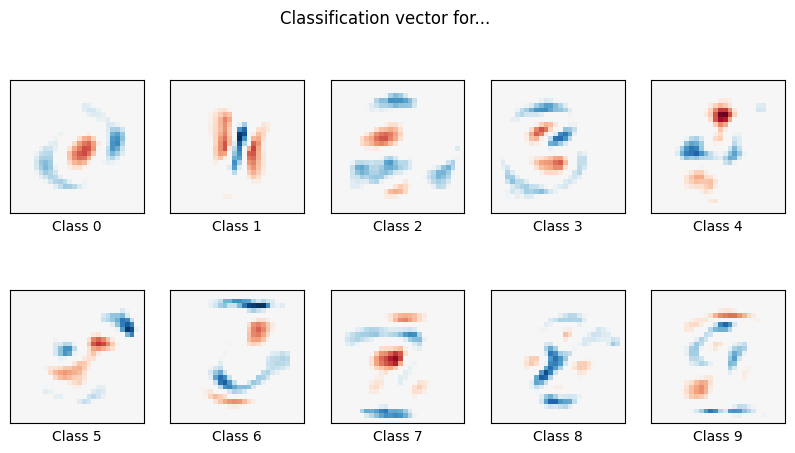

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Learning Rate

In [4]:
# Define depth
depth_variations = [
    [784, 156, 156, 10]
]

# Define activation functions
activation_variations = [
    [ReLU(), ReLU(), Softmax()]
]

In [5]:
# Create Neural Network
per_sepuluh_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

per_seratus_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

per_seribu_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_per_sepuluh = FFNN(per_sepuluh_network)

ffnn_per_seratus = FFNN(per_seratus_network)

ffnn_per_seribu = FFNN(per_seribu_network)

In [7]:
# Train the model
per_sepuluh_history = ffnn_per_sepuluh.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.1,
    verbose=1
)

per_seratus_history = ffnn_per_seratus.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

per_seribu_history = ffnn_per_seribu.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.001,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 191.17it/s, loss=26.5419]


Epoch 1/20 - 0.70s - loss: 26.5419 - val_loss: 25.3235


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 180.12it/s, loss=22.9101]


Epoch 2/20 - 0.73s - loss: 22.9101 - val_loss: 22.5448


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 138.25it/s, loss=22.8222]


Epoch 3/20 - 0.94s - loss: 22.8222 - val_loss: 22.6961


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 106.00it/s, loss=21.8963]


Epoch 4/20 - 1.24s - loss: 21.8963 - val_loss: 22.2994


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 91.37it/s, loss=21.6845]


Epoch 5/20 - 1.40s - loss: 21.6845 - val_loss: 21.9042


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 113.81it/s, loss=21.6465]


Epoch 6/20 - 1.13s - loss: 21.6465 - val_loss: 22.1834


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 92.11it/s, loss=20.3911] 


Epoch 7/20 - 1.39s - loss: 20.3911 - val_loss: 19.0952


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 163.90it/s, loss=19.4526]


Epoch 8/20 - 0.78s - loss: 19.4526 - val_loss: 19.7358


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 144.35it/s, loss=19.5697]


Epoch 9/20 - 0.91s - loss: 19.5697 - val_loss: 19.0703


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 151.94it/s, loss=18.6584]


Epoch 10/20 - 0.88s - loss: 18.6584 - val_loss: 18.9239


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 181.88it/s, loss=18.5758]


Epoch 11/20 - 0.78s - loss: 18.5758 - val_loss: 18.9541


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 136.99it/s, loss=18.9573]


Epoch 12/20 - 0.94s - loss: 18.9573 - val_loss: 19.9266


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 107.11it/s, loss=19.5804]


Epoch 13/20 - 1.19s - loss: 19.5804 - val_loss: 19.1143


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 164.04it/s, loss=20.3961]


Epoch 14/20 - 0.81s - loss: 20.3961 - val_loss: 20.2743


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 168.48it/s, loss=20.2644]


Epoch 15/20 - 0.76s - loss: 20.2644 - val_loss: 20.3722


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 155.18it/s, loss=20.0365]


Epoch 16/20 - 0.82s - loss: 20.0365 - val_loss: 20.0090


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 188.25it/s, loss=19.7386]


Epoch 17/20 - 0.69s - loss: 19.7386 - val_loss: 19.6871


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 216.75it/s, loss=19.3967]


Epoch 18/20 - 0.60s - loss: 19.3967 - val_loss: 19.3763


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 204.89it/s, loss=19.1777]


Epoch 19/20 - 0.62s - loss: 19.1777 - val_loss: 19.3763


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 150.27it/s, loss=19.1777]


Epoch 20/20 - 0.85s - loss: 19.1777 - val_loss: 19.3763


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 165.16it/s, loss=15.5337]


Epoch 1/20 - 0.78s - loss: 15.5337 - val_loss: 10.7953


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 154.18it/s, loss=8.2030]


Epoch 2/20 - 0.84s - loss: 8.2030 - val_loss: 8.2586


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 145.63it/s, loss=6.5073]


Epoch 3/20 - 0.89s - loss: 6.5073 - val_loss: 6.3345


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 132.86it/s, loss=3.9817]


Epoch 4/20 - 0.97s - loss: 3.9817 - val_loss: 4.9567


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 158.79it/s, loss=2.6793]


Epoch 5/20 - 0.81s - loss: 2.6793 - val_loss: 4.5024


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 151.41it/s, loss=2.2609]


Epoch 6/20 - 0.88s - loss: 2.2609 - val_loss: 4.4435


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 207.26it/s, loss=1.8214]


Epoch 7/20 - 0.67s - loss: 1.8214 - val_loss: 3.9595


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 192.92it/s, loss=1.5762]


Epoch 8/20 - 0.66s - loss: 1.5762 - val_loss: 3.8622


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 165.84it/s, loss=1.4077]


Epoch 9/20 - 0.78s - loss: 1.4077 - val_loss: 3.9130


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 136.08it/s, loss=1.3720]


Epoch 10/20 - 0.95s - loss: 1.3720 - val_loss: 3.7729


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 139.18it/s, loss=1.3379]


Epoch 11/20 - 0.94s - loss: 1.3379 - val_loss: 3.6958


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 186.52it/s, loss=1.2422]


Epoch 12/20 - 0.70s - loss: 1.2422 - val_loss: 3.6243


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 160.62it/s, loss=1.2014]


Epoch 13/20 - 0.81s - loss: 1.2014 - val_loss: 3.6561


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 127.56it/s, loss=1.1865]


Epoch 14/20 - 1.01s - loss: 1.1865 - val_loss: 3.5966


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 138.90it/s, loss=1.1818]


Epoch 15/20 - 0.93s - loss: 1.1818 - val_loss: 3.6092


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 179.81it/s, loss=1.1775]


Epoch 16/20 - 0.76s - loss: 1.1775 - val_loss: 3.6043


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 148.26it/s, loss=1.1763]


Epoch 17/20 - 0.89s - loss: 1.1763 - val_loss: 3.5998


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 148.04it/s, loss=1.1752]


Epoch 18/20 - 0.87s - loss: 1.1752 - val_loss: 3.5972


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 153.12it/s, loss=1.1673]


Epoch 19/20 - 0.84s - loss: 1.1673 - val_loss: 3.6006


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 186.25it/s, loss=1.1658]


Epoch 20/20 - 0.69s - loss: 1.1658 - val_loss: 3.5998


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 162.51it/s, loss=24.9354]


Epoch 1/20 - 0.80s - loss: 24.9354 - val_loss: 21.3217


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 178.68it/s, loss=17.9237]


Epoch 2/20 - 0.72s - loss: 17.9237 - val_loss: 16.6618


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 172.08it/s, loss=14.8240]


Epoch 3/20 - 0.75s - loss: 14.8240 - val_loss: 14.6176


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 153.46it/s, loss=12.9658]


Epoch 4/20 - 0.85s - loss: 12.9658 - val_loss: 13.1405


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 190.84it/s, loss=11.3714]


Epoch 5/20 - 0.67s - loss: 11.3714 - val_loss: 12.1035


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 159.37it/s, loss=10.2906]


Epoch 6/20 - 0.80s - loss: 10.2906 - val_loss: 11.2486


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 192.88it/s, loss=9.4202]


Epoch 7/20 - 0.68s - loss: 9.4202 - val_loss: 10.8100


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 190.10it/s, loss=8.8294]


Epoch 8/20 - 0.67s - loss: 8.8294 - val_loss: 10.3222


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 184.73it/s, loss=8.3915]


Epoch 9/20 - 0.69s - loss: 8.3915 - val_loss: 10.0123


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 188.27it/s, loss=8.0263]


Epoch 10/20 - 0.68s - loss: 8.0263 - val_loss: 9.8192


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 140.37it/s, loss=7.7290]


Epoch 11/20 - 0.92s - loss: 7.7290 - val_loss: 9.6695


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 62.55it/s, loss=7.4310]


Epoch 12/20 - 2.07s - loss: 7.4310 - val_loss: 9.3756


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 107.51it/s, loss=7.2158]


Epoch 13/20 - 1.19s - loss: 7.2158 - val_loss: 9.2310


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 145.87it/s, loss=7.0199]


Epoch 14/20 - 0.89s - loss: 7.0199 - val_loss: 9.0557


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 162.73it/s, loss=6.8678]


Epoch 15/20 - 0.79s - loss: 6.8678 - val_loss: 8.9122


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 158.94it/s, loss=6.7464]


Epoch 16/20 - 0.83s - loss: 6.7464 - val_loss: 8.8625


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 138.44it/s, loss=6.6074]


Epoch 17/20 - 0.94s - loss: 6.6074 - val_loss: 8.7259


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 147.40it/s, loss=6.5100]


Epoch 18/20 - 0.88s - loss: 6.5100 - val_loss: 8.6519


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 178.20it/s, loss=6.4248]


Epoch 19/20 - 0.72s - loss: 6.4248 - val_loss: 8.6062


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 169.69it/s, loss=6.3534]

Epoch 20/20 - 0.75s - loss: 6.3534 - val_loss: 8.5628


In [8]:
# Evaluate the model
evaluate_model(ffnn_per_sepuluh, X_test, y_test_onehot)

evaluate_model(ffnn_per_seratus, X_test, y_test_onehot)

evaluate_model(ffnn_per_seribu, X_test, y_test_onehot)

/home/dovodedomo/Tugas-Besar-I-ML/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.4439000000
Precision (macro)    0.2520676902
Recall (macro)       0.4377460533
F1 Score (macro)     0.3111700642
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8429000000
Precision (macro)    0.8420035582
Recall (macro)       0.8414948678
F1 Score (macro)     0.8416514036
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.6862000000
Precision (macro)    0.6278698312
Recall (macro)       0.6841697178
F1 Score (macro)     0.6505221708
------------------------------


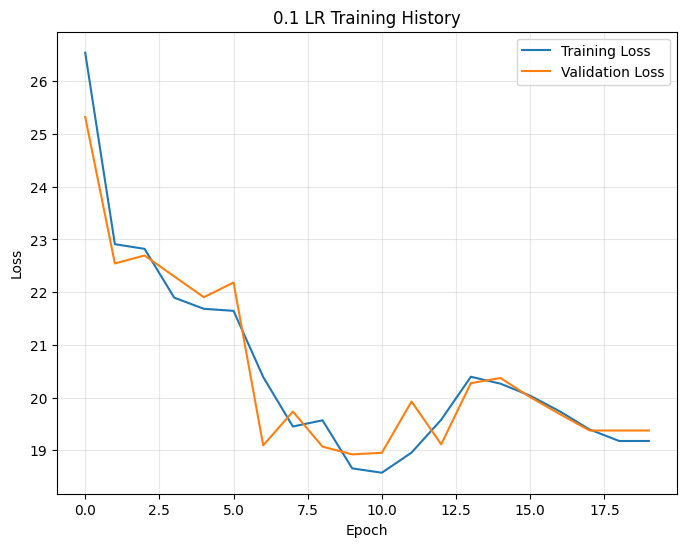

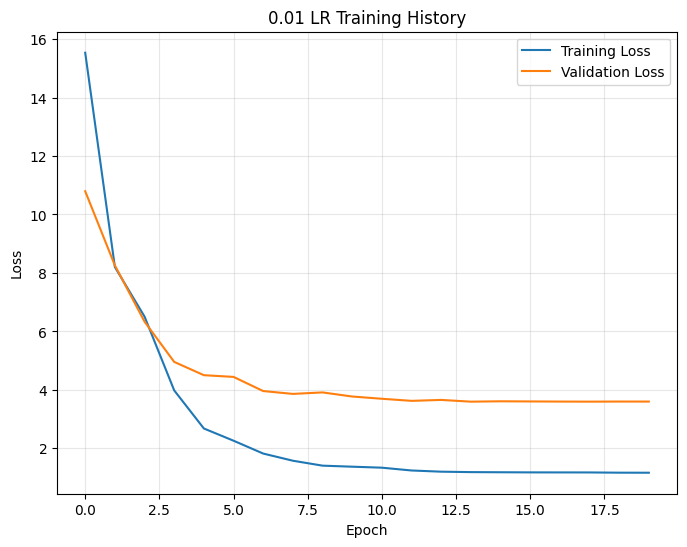

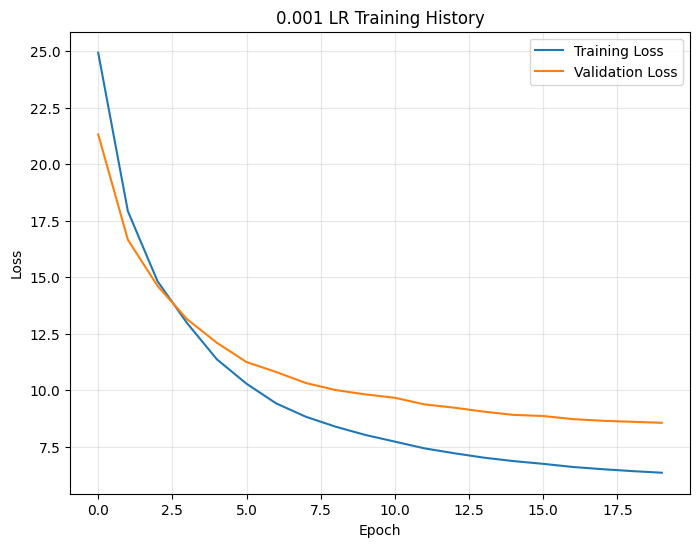

In [9]:
# Plot the training history
plot_training_loss(per_sepuluh_history, "0.1 LR Training History")

plot_training_loss(per_seratus_history, "0.01 LR Training History")

plot_training_loss(per_seribu_history, "0.001 LR Training History")

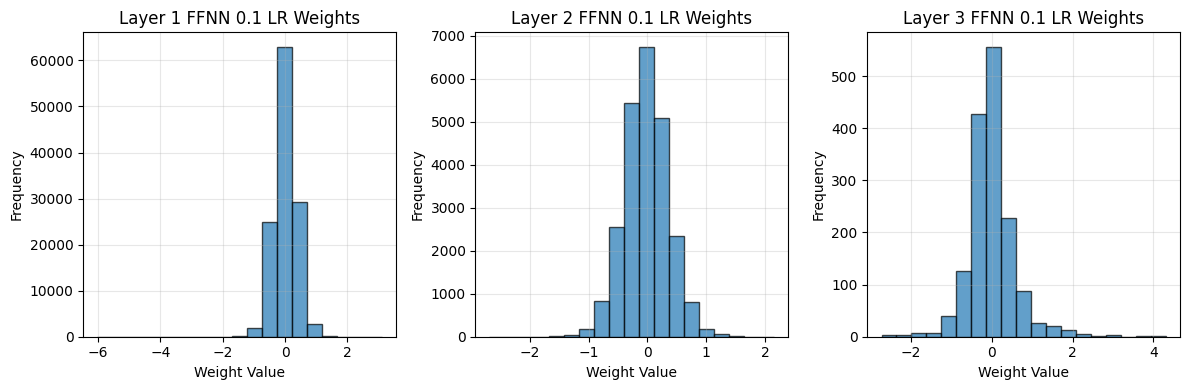

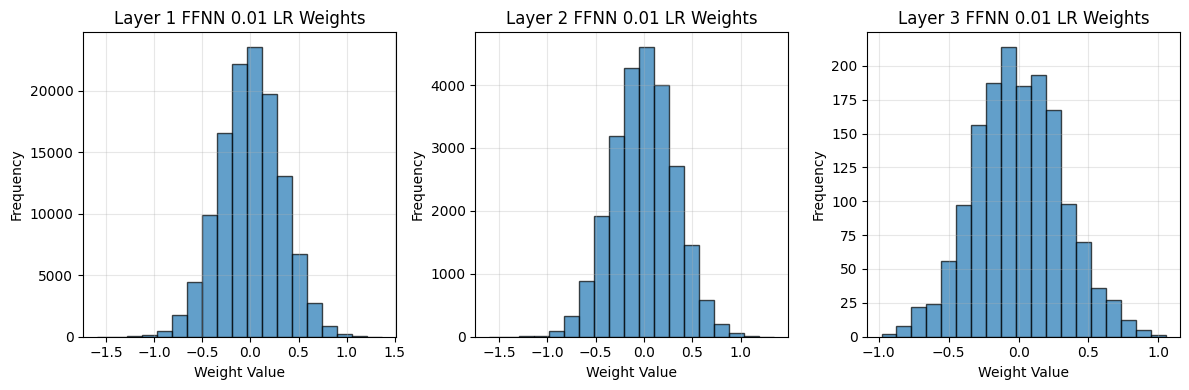

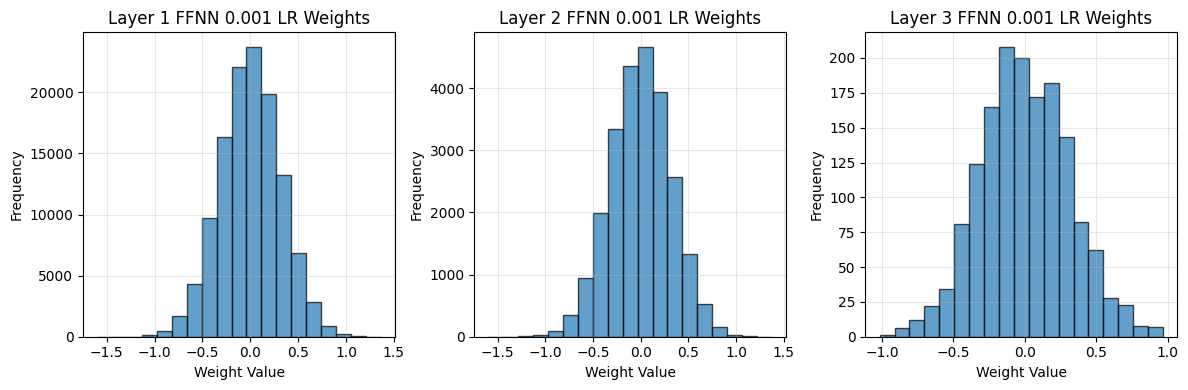

In [10]:
# Plot Weights
ffnn_per_sepuluh.plot_weights(title="FFNN 0.1 LR Weights")

ffnn_per_seratus.plot_weights(title="FFNN 0.01 LR Weights")

ffnn_per_seribu.plot_weights(title="FFNN 0.001 LR Weights")

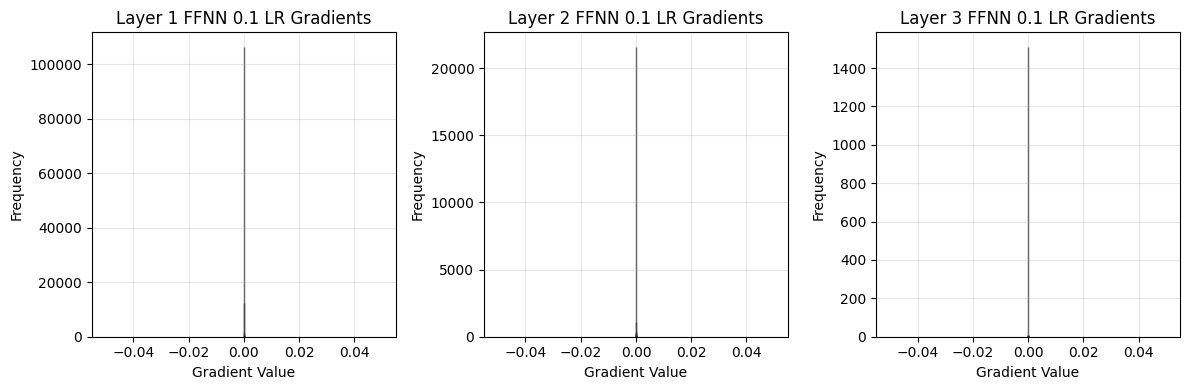

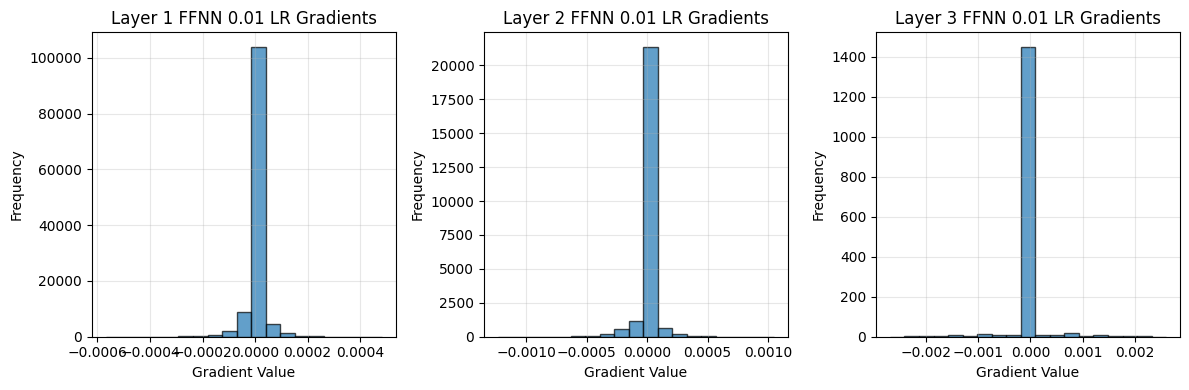

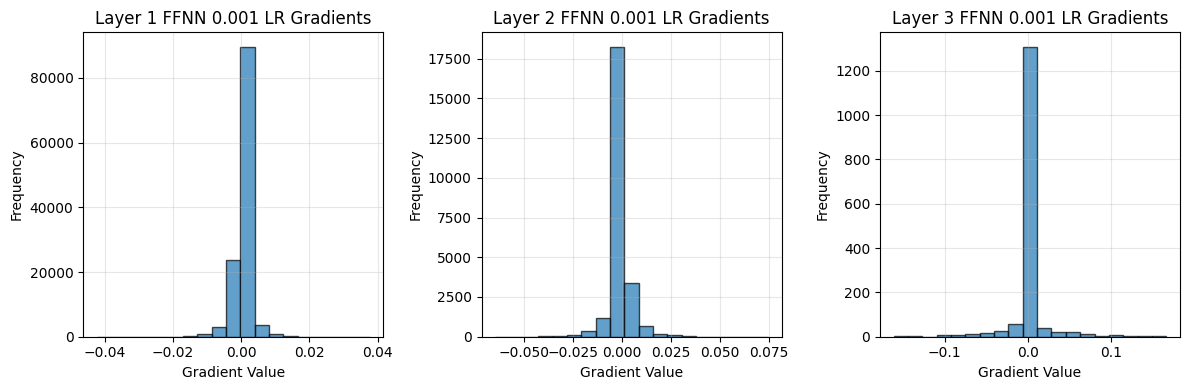

In [11]:
# Plot Gradient of Weights
ffnn_per_sepuluh.plot_gradients(title="FFNN 0.1 LR Gradients")

ffnn_per_seratus.plot_gradients(title="FFNN 0.01 LR Gradients")

ffnn_per_seribu.plot_gradients(title="FFNN 0.001 LR Gradients")